Implement the k_Means Clustering using "Income.csv"

In [41]:
import pandas as pd
df=pd.read_csv("income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


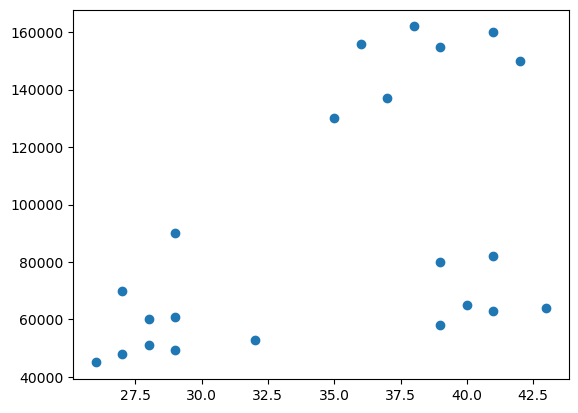

In [42]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'],df['Income($)'])

In [43]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)


In [44]:
model=km.fit_predict(df[['Age']],df[['Income($)']])

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [45]:
model

array([2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1])

In [46]:
df['clusters']=model

In [47]:
df

,Name,Age,Income($),clusters
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,0
9,Angelina,35,130000,0


In [48]:
df1=df[df.clusters==0]
df2=df[df.clusters==1]
df3=df[df.clusters==2]

In [53]:
df1

,Name,Age,Income($),clusters
8,Brad,36,156000,0
9,Angelina,35,130000,0
10,Donald,37,137000,0
15,Ranbir,32,53000,0


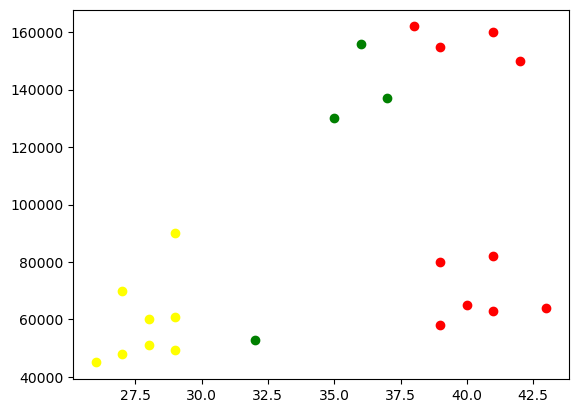

In [52]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='yellow')

In [50]:
df2

,Name,Age,Income($),clusters
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
16,Dipika,40,65000,1
17,Priyanka,41,63000,1
18,Nick,43,64000,1
19,Alia,39,80000,1
20,Sid,41,82000,1
21,Abdul,39,58000,1


In [55]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [65]:
df['Age']=mms.fit_transform(df[['Age']])
df['Income($)']=mms.fit_transform(df[['Income($)']])

In [66]:
df

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [67]:
y_pred=km.fit_predict(df[['Age','Income($)']])

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [68]:
y_pred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [71]:
df['cluster']=y_pred

In [76]:
df.drop(['clusters'],axis=1,inplace=True)

In [77]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


Text(0, 0.5, 'income')

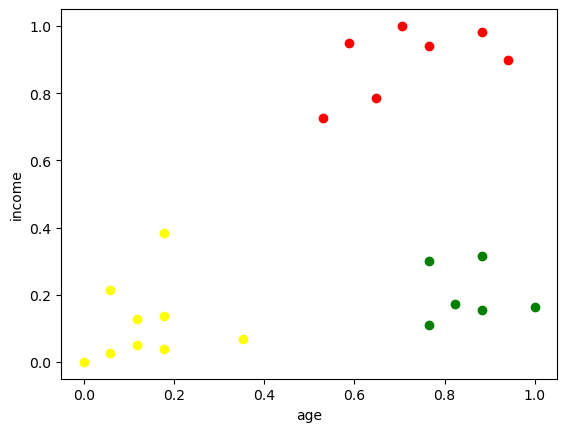

In [78]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='yellow')
plt.scatter(df3['Age'],df3['Income($)'],color='red')
plt.xlabel('age')
plt.ylabel('income')


In [83]:
k_rng=range(1,10)
lst=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    lst.append(km.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

In [80]:
lst

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.22443334487241418,
 0.16869711728567788,
 0.1397684499538816,
 0.10188787724979426]

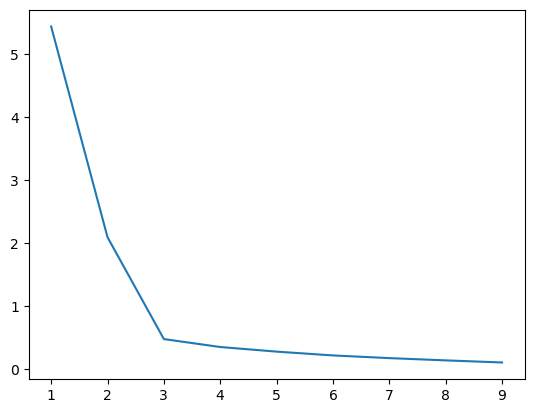

In [85]:
plt.plot(k_rng,lst)

In [86]:
import pandas as pd
data=pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [87]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [93]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

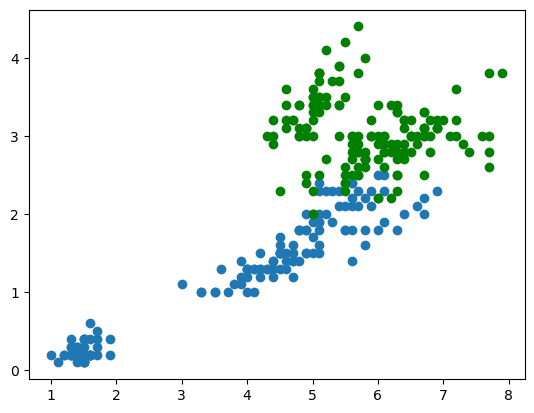

In [97]:
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'])
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],color='green')

In [98]:
from sklearn.decomposition import PCA
pca=PCA(0.95)

In [104]:
merge=pca.fit_transform(data[['SepalLengthCm']],data[['SepalWidthCm']])

In [103]:
merge1=pca.fit_transform(data[['PetalLengthCm']],data[['PetalWidthCm']])

In [105]:
data['Sepal']=merge
data['Petal']=merge1

In [106]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal,Petal
0,1,5.1,3.5,1.4,0.2,Iris-setosa,-0.743333,-2.358667
1,2,4.9,3.0,1.4,0.2,Iris-setosa,-0.943333,-2.358667
2,3,4.7,3.2,1.3,0.2,Iris-setosa,-1.143333,-2.458667
3,4,4.6,3.1,1.5,0.2,Iris-setosa,-1.243333,-2.258667
4,5,5.0,3.6,1.4,0.2,Iris-setosa,-0.843333,-2.358667


In [108]:
dff=data.drop(['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],axis=1)

In [109]:
dff.head()

,Species,Sepal,Petal
0,Iris-setosa,-0.743333,-2.358667
1,Iris-setosa,-0.943333,-2.358667
2,Iris-setosa,-1.143333,-2.458667
3,Iris-setosa,-1.243333,-2.258667
4,Iris-setosa,-0.843333,-2.358667


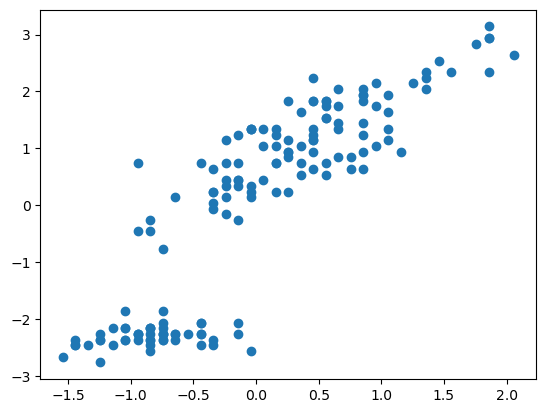

In [110]:
plt.scatter(dff['Sepal'],dff['Petal'])

In [111]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [114]:
dff['Sepal']=mms.fit_transform(dff[['Sepal']])
dff['Petal']=mms.fit_transform(dff[['Petal']])

In [116]:
dff.tail()

,Species,Sepal,Petal
145,Iris-virginica,0.666667,0.711864
146,Iris-virginica,0.555556,0.677966
147,Iris-virginica,0.611111,0.711864
148,Iris-virginica,0.527778,0.745763
149,Iris-virginica,0.444444,0.694915


In [122]:
from sklearn.cluster import KMeans
kmm=KMeans(n_clusters=4)
y_pred=kmm.fit_predict(dff[['Sepal','Petal']])
y_pred

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0,
       3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 2, 0, 0, 2, 3, 2, 0, 2,
       0, 0, 0, 3, 0, 0, 0, 2, 2, 0, 2, 3, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0])

In [123]:
dff['clusters']=y_pred

In [126]:
dff.tail(20)

,Species,Sepal,Petal,clusters
130,Iris-virginica,0.861111,0.864407,2
131,Iris-virginica,1.000000,0.915254,2
132,Iris-virginica,0.583333,0.779661,0
133,Iris-virginica,0.555556,0.694915,0
134,Iris-virginica,0.500000,0.779661,0
135,Iris-virginica,0.944444,0.864407,2
136,Iris-virginica,0.555556,0.779661,0
137,Iris-virginica,0.583333,0.762712,0
138,Iris-virginica,0.472222,0.644068,0
139,Iris-virginica,0.722222,0.745763,0


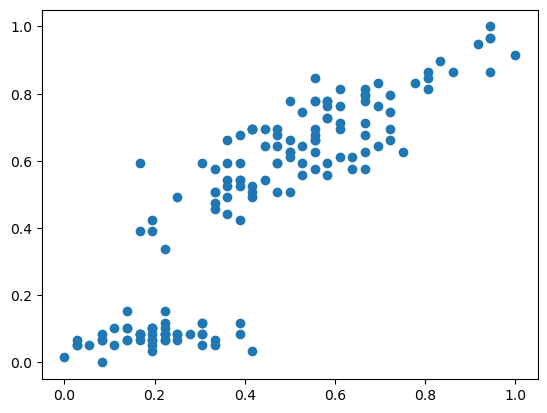

In [127]:
plt.scatter(dff['Sepal'],dff['Petal'])

In [129]:
dff1=dff[dff.clusters==0]
dff2=dff[dff.clusters==1]
dff3=dff[dff.clusters==2]
dff4=dff[dff.clusters==3]

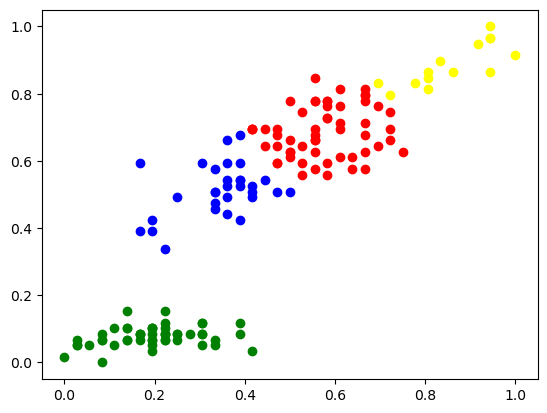

In [130]:
plt.scatter(dff1['Sepal'],dff1['Petal'],color='red')
plt.scatter(dff2['Sepal'],dff2['Petal'],color='green')
plt.scatter(dff3['Sepal'],dff3['Petal'],color='yellow')
plt.scatter(dff4['Sepal'],dff4['Petal'],color='blue')